In [5]:
# 数据来源: <Python读财> --- NBA数据分析

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option("display.max_column",None)
sns.set_style('white',{'font.sans-serif':['simhei','Arial']})

df_season = pd.read_pickle("E:\\study\\demo\\Data_Demo\\Python\\resource\\datasets\\season.pkl")
df_season[:5]

,球员,赛季,果,比赛,首发,时间,投篮,命中,出手,三分,命中.1,出手.1,罚球,命中.2,出手.2,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,type
1,迈克尔-乔丹,89-90,胜,骑士113-117公牛,1,50,62.2%,23,37,33.3%,2,6,91.3%,21,23,18,7,11,6,4,1,2,5,69,常规赛
2,迈克尔-乔丹,92-93,负,魔术128-124公牛,1,47,55.1%,27,49,20.0%,1,5,81.8%,9,11,6,4,2,1,5,0,2,5,64,常规赛
3,迈克尔-乔丹,86-87,胜,活塞120-125公牛,1,43,56.4%,22,39,NaN,0,0,94.4%,17,18,7,3,4,3,3,3,5,0,61,常规赛
4,迈克尔-乔丹,86-87,负,老鹰117-114公牛,1,41,57.9%,22,38,0.0%,0,3,81.0%,17,21,10,5,5,1,4,1,3,3,61,常规赛
5,迈克尔-乔丹,87-88,胜,活塞110-112公牛,1,42,77.8%,21,27,0.0%,0,1,89.5%,17,19,4,2,2,6,2,2,1,4,59,常规赛


In [6]:
df_season.rename(columns={"出手":"总出手","命中":"总命中","命中.1":"三分命中","出手.1":"三分出手","命中.2":"罚球命中","出手.2":"罚球出手"},inplace=True)
df_season[:5]

,球员,赛季,果,比赛,首发,时间,投篮,总命中,总出手,三分,三分命中,三分出手,罚球,罚球命中,罚球出手,篮板,前场,后场,助攻,抢断,盖帽,失误,犯规,得分,type
1,迈克尔-乔丹,89-90,胜,骑士113-117公牛,1,50,62.2%,23,37,33.3%,2,6,91.3%,21,23,18,7,11,6,4,1,2,5,69,常规赛
2,迈克尔-乔丹,92-93,负,魔术128-124公牛,1,47,55.1%,27,49,20.0%,1,5,81.8%,9,11,6,4,2,1,5,0,2,5,64,常规赛
3,迈克尔-乔丹,86-87,胜,活塞120-125公牛,1,43,56.4%,22,39,NaN,0,0,94.4%,17,18,7,3,4,3,3,3,5,0,61,常规赛
4,迈克尔-乔丹,86-87,负,老鹰117-114公牛,1,41,57.9%,22,38,0.0%,0,3,81.0%,17,21,10,5,5,1,4,1,3,3,61,常规赛
5,迈克尔-乔丹,87-88,胜,活塞110-112公牛,1,42,77.8%,21,27,0.0%,0,1,89.5%,17,19,4,2,2,6,2,2,1,4,59,常规赛


Text(0, 0.5, '胜率')

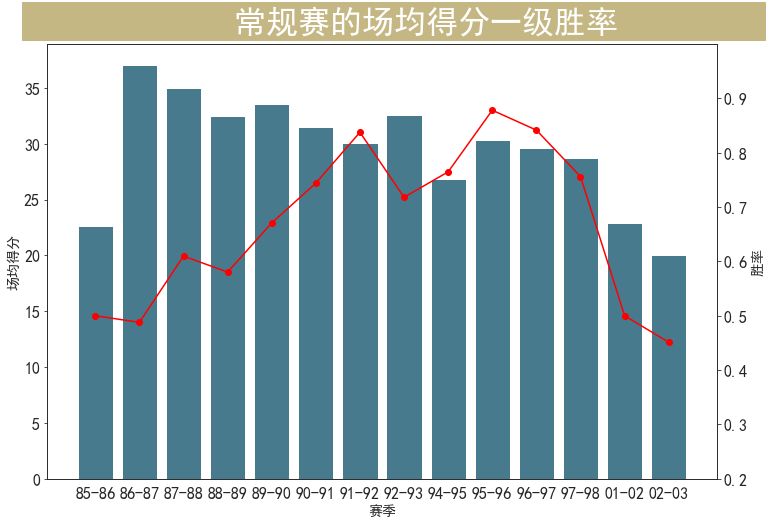

In [14]:
season = list(np.sort(df_season["赛季"].unique()))
season = season[2:] + season[:2]

df_season["win"] = df_season["果"].map({"胜":1,"负":0})
wining_rate = df_season.groupby(["赛季"])["win"].mean()[season].values
fig,ax = plt.subplots(figsize=(12,8))
fig.text(x=0.1,y=0.9,s='             常规赛的场均得分一级胜率         ',fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
sns.barplot(x="赛季",y="得分",data=df_season,order=season,ci=None,color='#3c7f99')
plt.tick_params(labelsize=16)
plt.ylabel("场均得分",fontsize=14)
plt.xlabel("赛季",fontsize=14)
ax2 = ax.twinx()
plt.scatter(x=season,y=wining_rate,color="r")
plt.plot(season,wining_rate,color="r")
plt.tick_params(labelsize=16)
ax2.set_yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.ylim(0.2,1)
plt.ylabel("胜率",fontsize=14)

([<matplotlib.patches.Wedge at 0x16ce0590>,
 [Text(0.9646092398939904, 0.5287050352617595, '20分及以下'),
  Text(-0.5530200733628357, 0.9508779093331404, '20-30'),
  Text(-0.42498004605954703, -1.0145895527015965, '30-40'),
  Text(0.9646089181377153, -0.5287056222976889, '40-50'),
  Text(1.096540197567763, -0.08717565668265004, '大于50')],
 [Text(0.5261504944876311, 0.2883845646882324, '16.0%'),
  Text(-0.30164731274336487, 0.5186606778180766, '34.8%'),
  Text(-0.23180729785066198, -0.5534124832917798, '35.8%'),
  Text(0.5261503189842083, -0.2883848848896485, '10.9%'),
  Text(0.5981128350369617, -0.04755035819053638, '2.5%')])

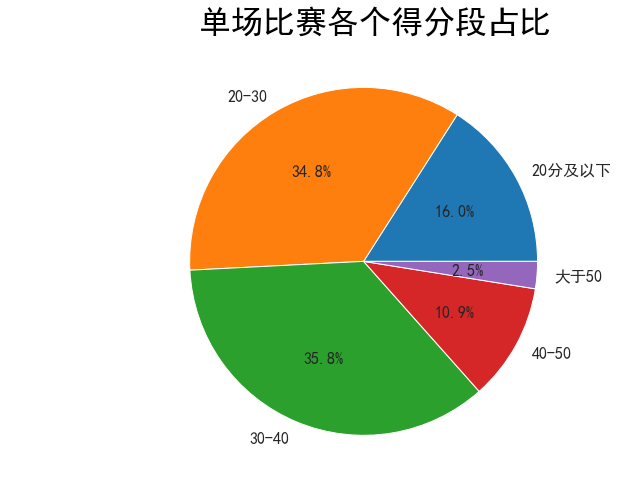

In [23]:
interval = ["20分及以下","20-30","30-40","40-50","大于50"]
value = pd.cut(df_season["得分"],bins=[0,20,30,40,50,100],labels=interval).value_counts(normalize=True)[interval].values
fig,ax = plt.subplots(figsize=(12,8))
fig.text(x=0.1,y=0.9,s='            单场比赛各个得分段占比     ',fontsize=32,weight='bold',color='black')
ax.pie(value,labels=interval,autopct='%1.1f%%',textprops={'size':16})

In [25]:
df_season["两分出手"] = df_season["总出手"]-df_season["三分出手"]
two_point_select = df_season["两分出手"].sum()/df_season["总出手"].sum()
three_point_select = 1-two_point_select
two_point_ratio = (df_season["得分"]-df_season["三分命中"]*3-df_season["罚球命中"]).sum()/df_season["得分"].sum()
free_throw_ratio = df_season["罚球命中"].sum()/df_season["得分"].sum()
three_point_ratio = 1-two_point_ratio-free_throw_ratio

end


Text(0, 0.5, '')

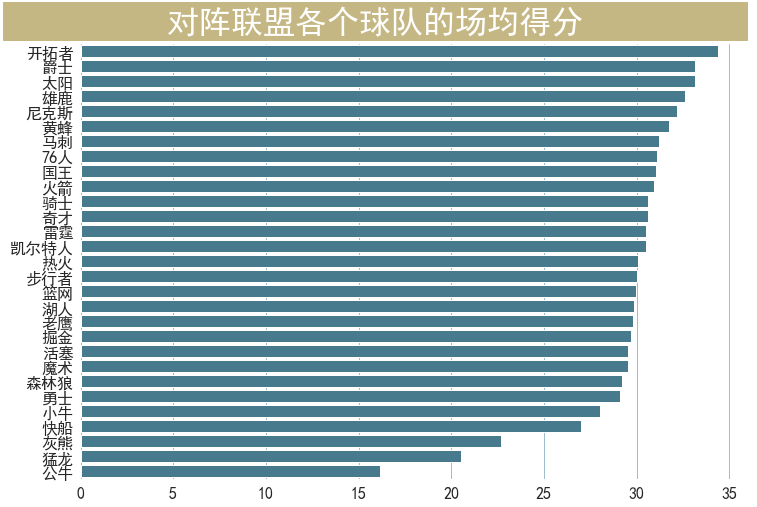

In [31]:
pattern = re.compile(r'[\u4E00-\u9FA5]+')
df_season["team_list"] = df_season["比赛"].str.findall(pattern).map(set)

d_01 = df_season["比赛"].str.findall(pattern)
d_02 = d_01.map(set)
print('end')
def get_opp(x,num=0):
    period_dict = {0:"公牛",1:"奇才"}
    opp = (x-set([period_dict[num]])).pop()
    if opp=="人":
        return "76人"
    elif opp=="凯尔特":
        return "凯尔特人"
    elif opp=="超音速":
        return "雷霆"
    elif opp=="子弹":
        return "奇才"
    else:
        return opp

df_season.loc[~df_season["赛季"].isin(["01-02","02-03"]),"opp"] = df_season["team_list"].map(lambda x:get_opp(x,0))
df_season.loc[df_season["赛季"].isin(["01-02","02-03"]),"opp"] = df_season["team_list"].map(lambda x:get_opp(x,1))

fig,ax = plt.subplots(figsize=(12,8))
order = df_season.groupby("opp")["得分"].mean().sort_values(ascending=False).index
sns.barplot(y="opp",x="得分",order=order,data=df_season,color="#3c7f99",ci=None)
plt.box(False)
fig.text(x=0.04,y=0.90,s='          对阵联盟各个球队的场均得分          ',fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
plt.tick_params(axis='both',which='major',labelsize=16)
ax.xaxis.grid(which='both',linewidth=0.5,color='#3c7f99')
plt.xlabel('')
plt.ylabel('')

d:\envir\python\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0, 0.5, '')

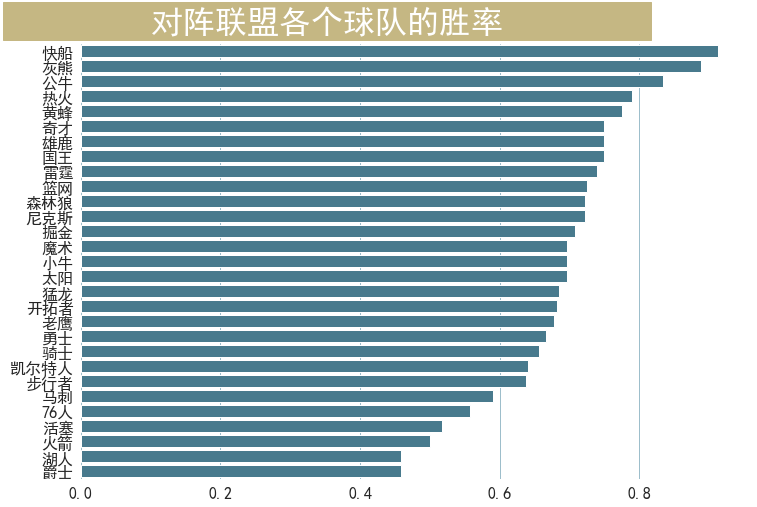

In [17]:
fig,ax = plt.subplots(figsize=(12,8))
order = df_season.groupby("opp")["win"].mean().sort_values(ascending=False).index
sns.barplot(y="opp",x="win",order=order,data=df_season,color='#3c7f99',ci=None)
plt.box(False)
fig.text(x=0.04,y=0.90,s='         对阵联盟各个球队的胜率         ',fontsize=32,weight='bold',color='white',backgroundcolor='#c5b783')
plt.tick_params(axis='both',which='major',labelsize=16)
ax.xaxis.grid(which='both',linewidth=0.5,color='#3c7f99')
plt.xlabel('')
plt.ylabel('')


